# Part 2 Multi-label Classification Using Random Forest

In [3]:
# import data from milestone 2 
import ast
# contains info about 5060 movies 
movie_df = pd.read_csv('dataset1.csv')

# to locate buffer overflow error
# import csv
# with open(r"dataset1.csv", 'rb') as f:
#     reader = csv.reader(f)
#     linenumber = 1
#     try:
#         for row in reader:
#             linenumber += 1
#     except Exception as e:
#         print (("Error line %d: %s %s" % (linenumber, str(type(e)), e.message)))

movie_df = movie_df.drop('Unnamed: 0', axis=1)
movie_df = movie_df.dropna()
labels = []

# convert 19 genre ids into a label matrix so that 
# for each movie, the genre is a 1*19 matrix, 1 meaning it's in the genre
for i in movie_df.genre_ids:
    label_matrix = np.zeros(len(genre_lst.keys()), dtype=int)
    for j in ast.literal_eval(i):
        if j in genre_lst.keys():
            label_matrix[genre_lst.keys().index(j)] = 1
    labels.append(label_matrix)
movie_df['labels'] = labels
len(movie_df)
movie_df.head()

,genre_ids,movie_id,overview,popularity,poster_path,release_date,title,vote_average,vote_count,labels
0,"[14, 10402, 10749]",321612,A live-action adaptation of Disney's version o...,149.542760,/tWqifoYuwLETmmasnGHO7xBjEtt.jpg,2017-03-16,Beauty and the Beast,6.9,1770,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
1,"[28, 18, 878]",263115,"In the near future, a weary Logan cares for an...",79.627847,/45Y1G5FEgttPAwjTYic6czC9xCn.jpg,2017-02-28,Logan,7.5,2429,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, ..."
2,"[16, 35, 18, 10751, 10402]",335797,A koala named Buster recruits his best friend ...,77.930498,/s9ye87pvq2IaDvjv9x4IOXVjvA7.jpg,2016-11-23,Sing,6.7,1170,"[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, ..."
3,"[28, 12, 14]",293167,Explore the mysterious and dangerous home of t...,61.012215,/5wBbdNb0NdGiZQJYoKHRv6VbiOr.jpg,2017-03-08,Kong: Skull Island,6.0,1203,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, ..."
4,"[28, 80, 53]",337339,When a mysterious woman seduces Dom into the w...,60.623332,/iNpz2DgTsTMPaDRZq2tnbqjL2vF.jpg,2017-04-12,The Fate of the Furious,7.2,482,"[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [4]:
import datetime

# function that converts dates to ints
def to_integer(dt_time):
    return 10000*dt_time.year + 100*dt_time.month + dt_time.day
  
# drop rows with malformed release date information
malformed_index = []
for i in range(0, len(movie_df)):
    f = movie_df.iloc[i].release_date.split('-')
    if len(f) != 3:
        malformed_index.append(i)  
movie_df = movie_df.drop(movie_df.index[malformed_index])

# new dataset length
print 'After deleting malformed dates, the data size is', len(movie_df)

int_dates = []
# convert datetime into integers 
for i in range(0, len(movie_df)):
    f = movie_df.iloc[i].release_date.split('-')
    a = datetime.date(int(f[0]), int(f[1]), int(f[2]))
    int_dates.append(to_integer(a))

movie_df['int_dates'] = int_dates

# final sample size 
print 'The final sample size is', len(movie_df) 

# write to csv
movie_df.to_csv('tmdb_metadata.csv', encoding = 'utf-8')   

After deleting malformed dates, the data size is 4902
The final sample size is 4902


In the following cell, we combine results from text processing with with the numerical predictors. Please refer to TextVectorizing.ipynb to see how we generated genre_words_pca.

In [5]:
# import dataset 
metadata = pd.read_csv('tmdb_metadata.csv')

# import results of text processing after pca, 90% variance explained
df_a = pd.read_csv('genre_words_pca.csv')

# select other predictors 
df_b = metadata[['popularity','int_dates','vote_average','vote_count']] 

# create dataframe
treedata_X = pd.concat([df_a, df_b], axis=1)

treedata_y = np.asarray(metadata['labels'].tolist())

# examine the data 
treedata_X[25:30]

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,294,295,296,297,298,299,popularity,int_dates,vote_average,vote_count
25,25,0.368577,0.840917,0.272582,-0.435428,-0.135311,0.059444,-0.251731,-0.171425,0.123310,...,-0.189341,-0.063305,-0.401295,-0.198236,0.209343,-0.243798,1.321019,20051020,5.3,2
26,26,0.764552,-1.377594,-0.142785,-0.615930,-0.332792,0.233683,-0.465798,0.304202,-0.122500,...,0.031852,-0.009340,-0.000459,0.019383,0.012910,0.034607,1.321017,19731006,6.2,12
27,27,1.553418,-1.984979,-0.104861,-0.828822,-0.502757,0.166974,-0.700010,0.355295,-0.188343,...,0.084633,0.049862,-0.062283,0.013205,-0.050039,-0.131973,1.320991,19871225,6.7,29
28,28,0.358079,0.923268,1.380883,-0.058584,-0.866399,-0.163135,0.157153,0.391488,-0.266951,...,0.003047,0.010992,0.047739,-0.007493,-0.041105,0.013070,1.320988,20170407,0.0,0
29,29,0.088955,0.560351,1.049459,0.146033,-0.171834,-0.101794,-0.307366,0.142916,-0.346554,...,-0.045943,-0.022995,-0.022300,-0.087274,0.019076,0.031588,1.320942,20150313,3.2,3


This dataset now has over 300 predictors and 4900 entries. We conduct pca on the data to enable faster tuning. 

In [6]:
# create tree_data_pca
from sklearn.decomposition import PCA
from sklearn import preprocessing

tree_x = treedata_X.values 
tree_x_scaled = preprocessing.scale(tree_x)
pca = PCA(n_components = 273)
pca.fit(tree_x_scaled)
tree_x_pca = pca.transform(tree_x_scaled)
print "explained variance: " + str(sum(pca.explained_variance_ratio_))

explained variance: 0.901185187595


In this section, we first try a decision tree classifier to establish the baseline, then tunes a random forest classifier to improve the prediction accuracy. Meanwhile, we also develop a different matric to measure prediction accuracy, which we are calling "mean match ratio."

In [8]:
# establish baseline decision tree accuracy 
# http://scikit-learn.org/stable/modules/tree.html#tree 1.10.3. Multi-output problems
print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split

# train test split 
X_train, X_test, y_train, y_test = train_test_split(treedata_X, treedata_y, test_size=0.4, random_state=42)

# fit model
class_1 = DecisionTreeClassifier()
class_1.fit(X_train, y_train)

# predict 
pred_train = class_1.predict(X_train)
pred_test = class_1.predict(X_test)

# metric 1 - complete match percentage via .score
print 'The proportion of complete matches in training set is', class_1.score(X_train, y_train)
print 'The proportion of complete matches in test set is', class_1.score(X_test, y_test)

Automatically created module for IPython interactive environment
The proportion of complete matches in training set is 1.0
The proportion of complete matches in test set is 0.0331463539011


Above are the baseline results from decision tree with 305 predictors. 

In [12]:
# with pca
# train test split 
X_pca_train, X_pca_test, y_train, y_test = train_test_split(tree_x_pca, treedata_y, test_size=0.4, random_state=42)

# fit model 
class_pca = DecisionTreeClassifier()
class_pca.fit(X_pca_train, y_train)

# predict 
pred_train_pca = class_pca.predict(X_pca_train)
pred_test_pca = class_pca.predict(X_pca_test)

# metric 1 - complete match percentage via .score
print 'The proportion of complete matches in training set is', class_pca.score(X_pca_train, y_train)
print 'The proportion of complete matches in test set is', class_pca.score(X_pca_test, y_test)

 The proportion of complete matches in training set is 1.0
The proportion of complete matches in test set is 0.0280469148394


Above are the baseline results from decision tree with 273 principle components. 

"Score" is very harsh because it requires the prediction to be correct for all labels to be correct for an entry. We develop a different metric for correctness as follows. 

For example, when true genre labels are [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
And predicted genre labels are [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
The ratio of matching labels are 0.824561403509
For the baseline model, the mean and median match ratios are

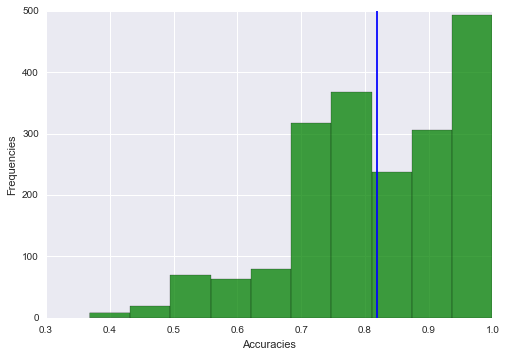

 (0.81818263148948356, 0.82456140350877194)


In [17]:
import difflib
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# metric 2 - match ratio 
def compute_match_ratio(y_true, y_pred):
    # prediction accuracies according to similarity ratio 
    test_similarity = []
    for i in range(0,len(y_true)):
        sm = difflib.SequenceMatcher(None, a = y_true[i], b = y_pred[i])
        # ratio() returns a measure of the sequences’ similarity as a float in the range [0, 1].
        # Where T is the total number of elements in both sequences, and M is the number of matches, 
        # this is 2.0*M / T. 1.0 if the sequences are identical, and 0.0 if they have nothing in common.
        test_similarity.append(sm.ratio())
        
    # the histogram of the data (optional)
    n, bins, patches = plt.hist(test_similarity, facecolor='green', alpha=0.75)
    plt.xlabel('Accuracies')
    plt.ylabel('Frequencies')
    plt.axvline(x = np.mean(test_similarity))
    plt.grid(True)
    plt.show()

    # metric 2: mean and median test similarity
    return np.mean(test_similarity), np.median(test_similarity);

# single line example 
print 'For example, when true genre labels are', y_test[0]
print 'And predicted genre labels are', pred_test[0]
print 'The ratio of matching labels are', difflib.SequenceMatcher(None,y_test[0], pred_test[0]).ratio()
print 'For the baseline model, the mean and median match ratios are', compute_match_ratio(y_test, pred_test)

Therefore, the baseline accuracy of our decision tree models are as follows:
- The proportion of complete matches in training set is 1.0. It's definitely overfitting.
- The proportion of complete matches in test set is 0.0407955124936
- The mean match ratio is 82%, which means out of all predicted labels, 82% matched true values. We understand that since most values are zeros, the match ratio will always seem high. 
- The median match ratio is 82.5%. 

## Tune Random Forest Classifier 

Three important parameters of sklearn's Random Forest module that influence the model fit are the number of trees, n_estimators, the number of predictors to consider for each split, max_features, and the maximum depth of the trees, max_depth. Below, we tune two of these parameters, n_estimators and max_depth, using 5-fold cross-validation on a 2D grid of parameter values. 

In [14]:
from sklearn import tree
from sklearn import ensemble
from sklearn.cross_validation import KFold

In [23]:
# Parameters for tuning random forest 
n_trees = np.arange(60, 120, 20)  # Trees and depth are explored on an exponentially growing space,
depths = np.arange(2, 10)  # since it is assumed that trees and depth will add accuracy in a decaying fashion.

# To keep track of the best model
best_score = 0

# Run grid search for model with 5-fold cross validation
print '5-fold cross validation:'

for trees in n_trees:
    for depth in depths:        
        # Cross validation for every experiment
        k_folds = KFold(X_train.shape[0], n_folds=5, shuffle=True)
        scores = []
        for train_indices, validation_indices in k_folds:
            # Generate training data
            x_train_cv = X_train.iloc[train_indices]
            y_train_cv = y_train[train_indices]
            # Generate validation data
            x_validate = X_train.iloc[validation_indices]
            y_validate = y_train[validation_indices]
            
            # Fit random forest on training data
            model = ensemble.RandomForestClassifier(n_estimators=trees, max_depth=depth)
            model.fit(x_train_cv, y_train_cv)
            # Score on validation data
            scores += [model.score(x_validate, y_validate)]
        
        # Record and report accuracy
        average_score = np.mean(scores)
        print "Trees:", trees, "Depth:", depth, "Score:", average_score
        
        # Update our record of the best parameters see so far
        if average_score > best_score:
            best_score = average_score
            best_trees = trees
            best_depth = depth

 5-fold cross validation:
Trees: 60 Depth: 2 Score: 0.089758959611
Trees: 60 Depth: 3 Score: 0.0904461614867
Trees: 60 Depth: 4 Score: 0.0975820888627
Trees: 60 Depth: 5 Score: 0.0975815113821
Trees: 60 Depth: 6 Score: 0.102687594562
Trees: 60 Depth: 7 Score: 0.100308952104
Trees: 60 Depth: 8 Score: 0.110505526489
Trees: 60 Depth: 9 Score: 0.101328205306
Trees: 80 Depth: 2 Score: 0.0901071803934
Trees: 80 Depth: 3 Score: 0.0911247011538
Trees: 80 Depth: 4 Score: 0.0952051788457
Trees: 80 Depth: 5 Score: 0.0982716006606
Trees: 80 Depth: 6 Score: 0.0989403231581
Trees: 80 Depth: 7 Score: 0.100647933197
Trees: 80 Depth: 8 Score: 0.104727833408
Trees: 80 Depth: 9 Score: 0.105069124424
Trees: 100 Depth: 2 Score: 0.0901077578739
Trees: 100 Depth: 3 Score: 0.0907868750217
Trees: 100 Depth: 4 Score: 0.0897716641835
Trees: 100 Depth: 5 Score: 0.0935085409376
Trees: 100 Depth: 6 Score: 0.10031530439
Trees: 100 Depth: 7 Score: 0.104049871222
Trees: 100 Depth: 8 Score: 0.102007899934
Trees: 100 De

For the tuned random forest model
Chosen number of trees, depth: 60 , 8
Test accuracy: 0.10249872514


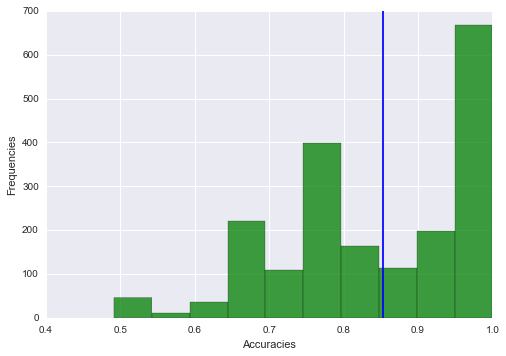

(0.85321667248181643, 0.84210526315789469)
Above are the mean and median match ratios on the test set
Train accuracy: 0.31655899354


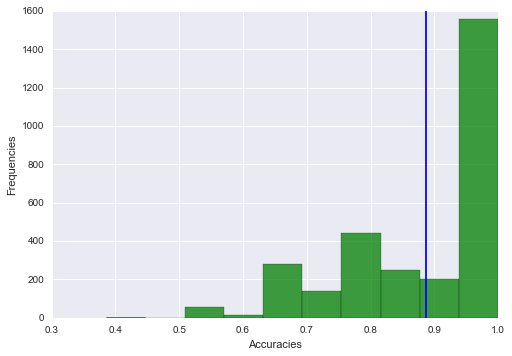

(0.88762624003054214, 0.94736842105263153)
Above are the mean and median match ratios on the train set


In [24]:
# without pca 
print 'For the tuned random forest model'
print 'Chosen number of trees, depth:', best_trees, ',', best_depth
print 'Test accuracy:', model.score(X_test, y_test)
pred_test_tuned = model.predict(X_test)
print compute_match_ratio(y_test, pred_test_tuned)
print 'Above are the mean and median match ratios on the test set'

print 'Train accuracy:', model.score(X_train, y_train)
pred_train_tuned = model.predict(X_train)
print compute_match_ratio(y_train, pred_train_tuned)
print 'Above are the mean and median match ratios on the train set'

In [19]:
# with pca
# Parameters for tuning random forest 
n_trees = np.arange(80, 140, 20)  # Trees and depth are explored on an exponentially growing space,
depths = np.arange(10, 15)  # since it is assumed that trees and depth will add accuracy in a decaying fashion.

# To keep track of the best model
best_score = 0

# Run grid search for model with 5-fold cross validation
print '5-fold cross validation:'

for trees in n_trees:
    for depth in depths:        
        # Cross validation for every experiment
        k_folds = KFold(X_pca_train.shape[0], n_folds=5, shuffle=True)
        scores = []
        for train_indices, validation_indices in k_folds:
            # Generate training data
            x_train_cv = X_pca_train[train_indices]
            y_train_cv = y_train[train_indices]
            # Generate validation data
            x_validate = X_pca_train[validation_indices]
            y_validate = y_train[validation_indices]
            
            # Fit random forest on training data
            model = ensemble.RandomForestClassifier(n_estimators=trees, max_depth=depth)
            model.fit(x_train_cv, y_train_cv)
            # Score on validation data
            scores += [model.score(x_validate, y_validate)]
        
        # Record and report accuracy
        average_score = np.mean(scores)
        print "Trees:", trees, "Depth:", depth, "Score:", average_score
        
        # Update our record of the best parameters see so far
        if average_score > best_score:
            best_score = average_score
            best_trees = trees
            best_depth = depth


5-fold cross validation:
Trees: 80 Depth: 10 Score: 0.092480625527
Trees: 80 Depth: 11 Score: 0.0931608976358
Trees: 80 Depth: 12 Score: 0.0935068084959
Trees: 80 Depth: 13 Score: 0.103363824307
Trees: 80 Depth: 14 Score: 0.09792511232
Trees: 100 Depth: 10 Score: 0.0969023942344
Trees: 100 Depth: 11 Score: 0.0907834101382
Trees: 100 Depth: 12 Score: 0.103029463059
Trees: 100 Depth: 13 Score: 0.0928276913482
Trees: 100 Depth: 14 Score: 0.0996269475532
Trees: 120 Depth: 10 Score: 0.0941789958768
Trees: 120 Depth: 11 Score: 0.0941859256436
Trees: 120 Depth: 12 Score: 0.0952011364818
Trees: 120 Depth: 13 Score: 0.0982698682189
Trees: 120 Depth: 14 Score: 0.0986082718317


For the tuned random forest model
Chosen number of trees, depth: 120 , 14
Test accuracy: 0.0963793982662


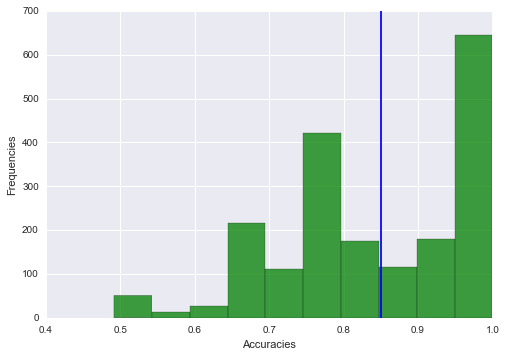

(0.84976336813476827, 0.84210526315789469)
Above are the mean and median match ratios on the test set
Train accuracy: 0.662699761986


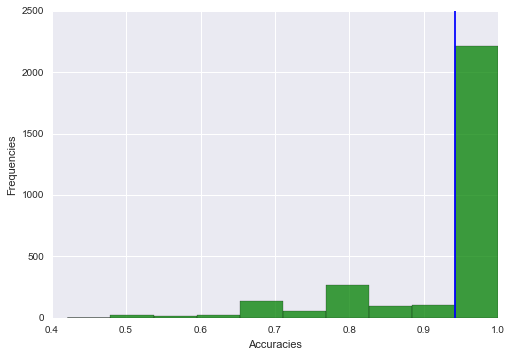

(0.94168351855497301, 1.0)
Above are the mean and median match ratios on the train set


In [21]:
# with pca
best_pca_trees = 120
best_pca_depth = 14

print 'For the tuned random forest model'
print 'Chosen number of trees, depth:', best_pca_trees, ',', best_pca_depth
print 'Test accuracy:', model.score(X_pca_test, y_test)
pred_test_tuned = model.predict(X_pca_test)
print compute_match_ratio(y_test, pred_test_tuned)
print 'Above are the mean and median match ratios on the test set'

print 'Train accuracy:', model.score(X_pca_train, y_train)
pred_train_tuned = model.predict(X_pca_train)
print compute_match_ratio(y_train, pred_train_tuned)
print 'Above are the mean and median match ratios on the train set'